# Exploratory Data Analysis (EDA)

 - Summarize main characteristics of the data
 - Gain better understanding of the dataset
 - Uncover relationships between variables
 - Extract important variables

## Descriptive Statistics

 - Describe basic features of data

Useful Python functions:

#### df.describe()
Summarize basic statistics as mean, standard deviation, min, max.

#### df["column"].value_counts()
Summarize categorical data by grouping and counting variables.

#### sns.boxplot(x="column", y="variable", data=df)
Visualize the various distributions of the data.

#### plt.scatter(x = df[predictor], y = df[predicted])
Show the relationship between two variables.

***

## Grouping Data

 - Group data by categories

#### df[["A, "B"]].group_by(["B"], as_index=False).mean()
Calculate the mean values of column "A" grouped by the different categories of column "B".

#### df_pivot = df_grp.pivot(index = "column A", columns = "column B")
Display data in a table showing the distribution of values between column "A" and column "B".

#### Heatmap
##### plt.pcolor(df_pivot, cmap="RdBu")
##### plt.colorbar()
Plot target variable over multiple variables

***

## Correlation
 
 - Measures to what extent different variables are dependant.
 
### Positive linear relationship
##### sns.regplot(x = "column A", y = "column B", data = df)

### Pearson Correlation
Measure the strength of the correlation between two features.

##### pearson_coef, p_value = stats.pearsonr(df["column A"], df["column B"])

## Analysis of Variance (ANOVA)

 - Statistical comparison of groups. Finds correlation between different groups of a categorical variable.
 
##### df_anova = df[["column A", "column B"]]
##### grouped_anova = df_anova.groupby(["column A"])
##### anova_results = stats.f_oneway(grouped_anova.get_group("variable 1")["column B"], grouped_anova.get_group("variable 2")["column B"])

***

# Practice

Import libraries and load dataframe:

In [5]:
import pandas as pd
import numpy as np

file = "clean_df.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


## Analyze individual features using visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# show plot inside jupyter notebook
%matplotlib inline

### Positive linear regression

(0, 53431.826745168226)

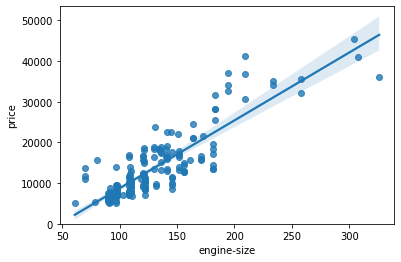

In [10]:
# Engine size as potential predictor variable of price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [11]:
# Examine the correlation between engine size and price
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


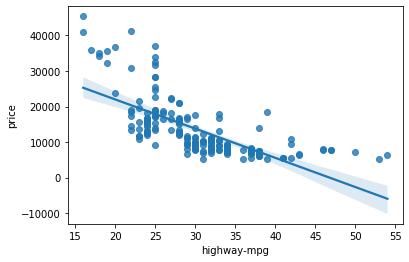

In [16]:
# Fuel consumption as potential predictor variable of price
sns.regplot(x='highway-mpg', y='price', data=df)

In [17]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak linear relationship

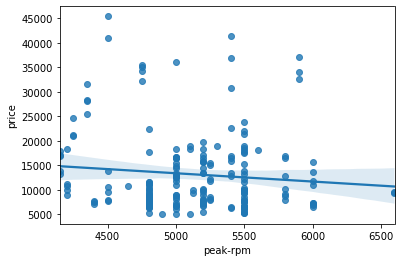

In [18]:
# Peak RPM as potential predictor variable of price
sns.regplot(x='peak-rpm', y='price', data=df)

In [19]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


A regression line close to horizonte indicates the variable is not a good predictor, corroborated by the low correlation factor.

### Categorical variables

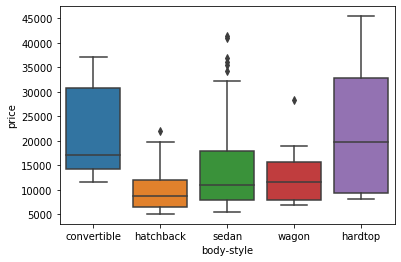

In [21]:
# Relationship between 'body-style' and 'price'
sns.boxplot(x='body-style', y='price', data=df)

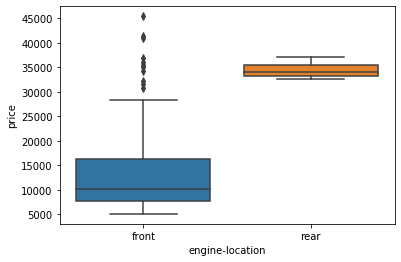

In [22]:
# Relationship between 'engine-location' and 'price'
sns.boxplot(x='engine-location', y='price', data=df)

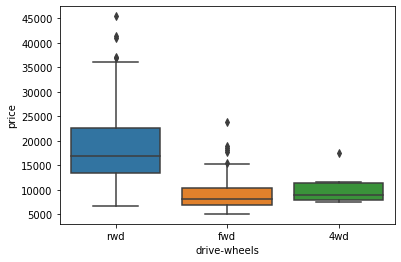

In [23]:
# Relationship between 'drive-wheels' and 'price'
sns.boxplot(x='drive-wheels', y='price', data=df)

Engine location and drive wheels could potentially be good predictors of price due to the distribution of price between their different categories. Body style has a too small distribution to be considered a good predictor.

## Descriptive Statistical Analysis

In [25]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [26]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


### Value counts

In [29]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [30]:
# convert the series to a dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Store 'drive-wheels' data in a new dataframe and rename columns and index names accordingly

In [32]:
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repeat the process for the variable 'engine-location'

In [34]:
engine_location_count = df['engine-location'].value_counts().to_frame()
engine_location_count.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_location_count.index.name = 'engine-location'
engine_location_count

,value_counts
engine-location,
front,198
rear,3


Engine location would not be a good predictor since there are 198 results in one category and only 3 at the other.